# 1. Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load Dataset

In [2]:
data = pd.read_csv("housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# 3. Data Exploration

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**Observation:**  
- `total_bedrooms` has 207 null values, which is approximately 1% of the data. So, we can just drop them.

In [4]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


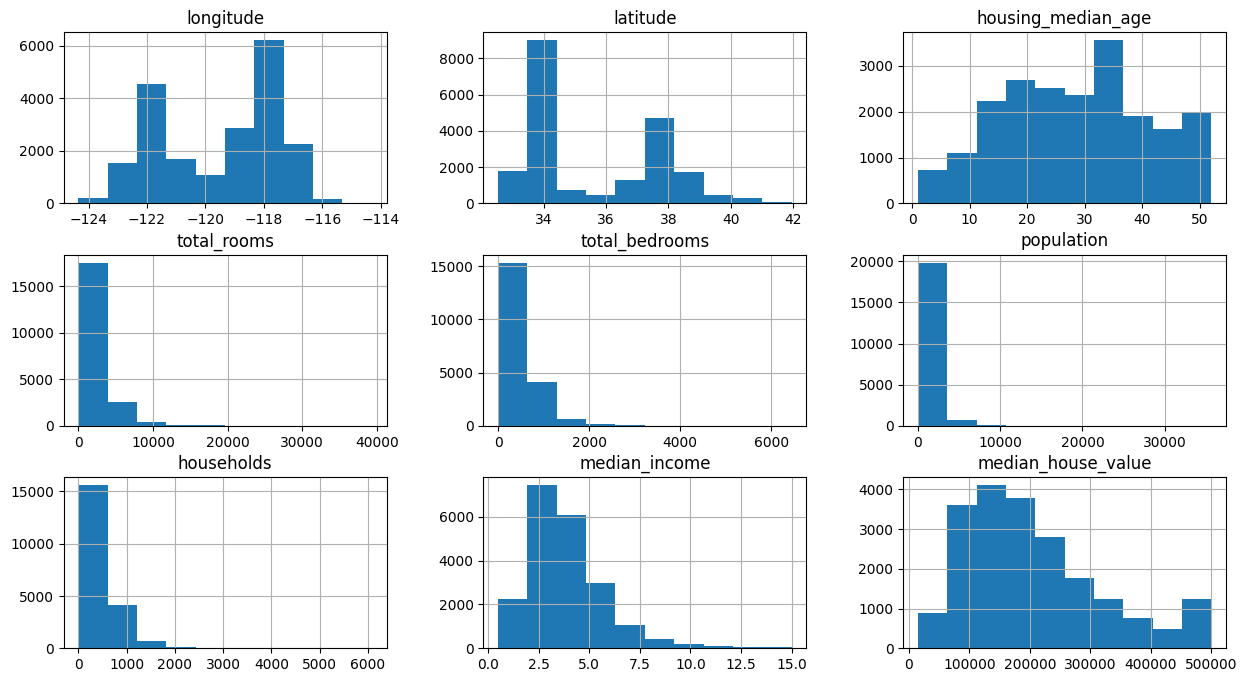

In [5]:
data.hist(figsize=(15,8))
data.dropna(inplace=True)

**Observation:**  
- Most histograms are right screwed

<Axes: >

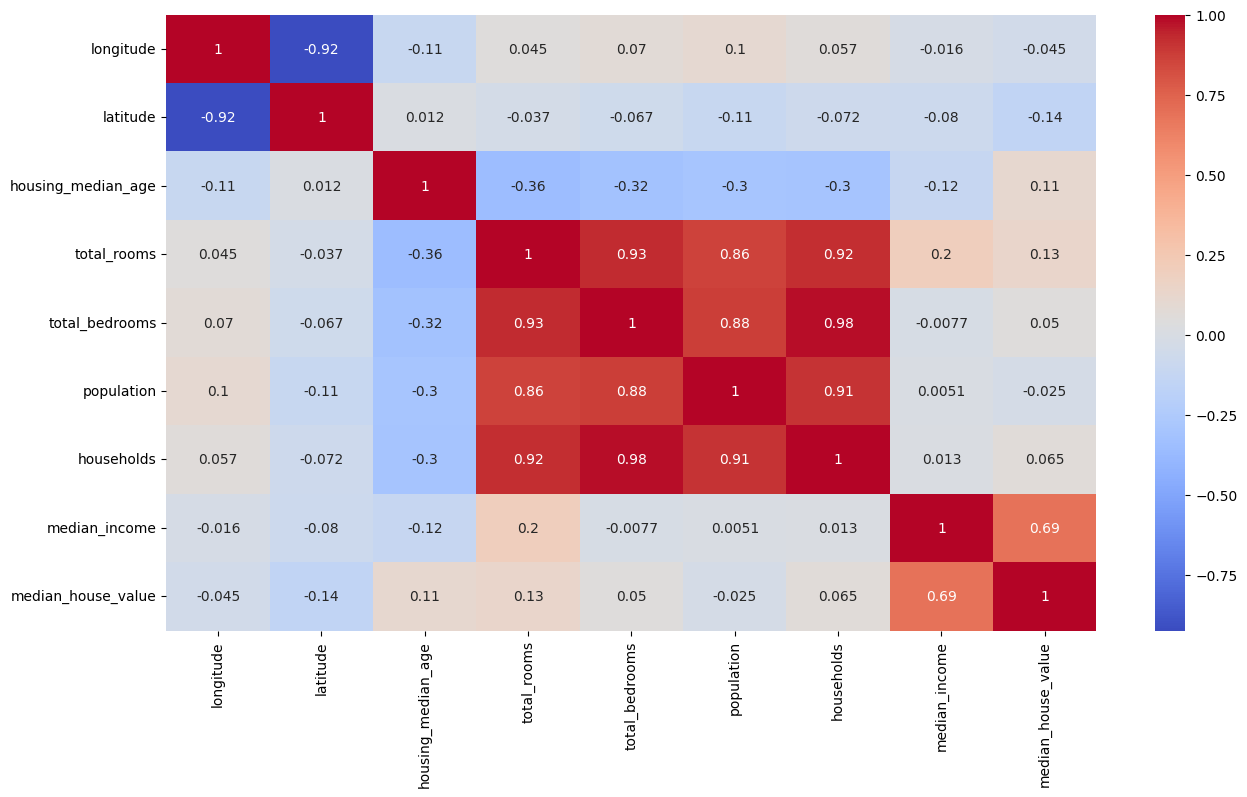

In [6]:
plt.figure(figsize=(15,8))
sns.heatmap(data.select_dtypes(include='number').corr(),annot=True,cmap='coolwarm')

**Observation:**  
- `median_income` and the target `median_house_value` have a strong correlation.

# 4. Data Preprocessing

In [7]:
# Train Test Validation split
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis = 1)
y = data['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

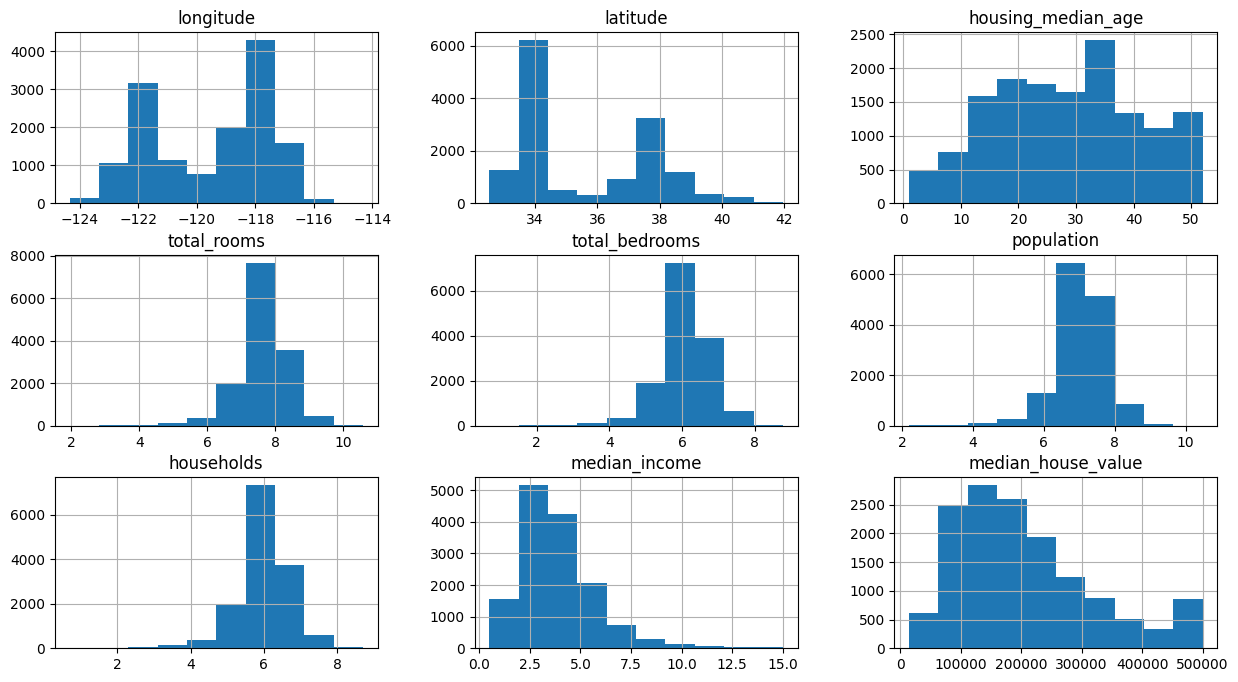

In [8]:
train_data = X_train.join(y_train)

# log normal tranformation for the right sckewed columns
train_data['total_rooms'] = np.log1p(train_data['total_rooms'])
train_data['total_bedrooms'] = np.log1p(train_data['total_bedrooms'])
train_data['population'] = np.log1p(train_data['population'])
train_data['households'] = np.log1p(train_data['households'])

train_data.hist(figsize=(15,8))

In [9]:
train_data["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     6307
INLAND        4539
NEAR OCEAN    1877
NEAR BAY      1577
ISLAND           3
Name: count, dtype: int64

In [10]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity).astype(int))

train_data = train_data.drop('ocean_proximity', axis=1)

train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
19215,-122.71,38.45,52.0,7.723120,6.287859,6.864848,6.255750,2.1827,188800.0,1,0,0,0,0
2763,-115.88,32.93,15.0,5.342334,3.912023,3.951244,3.044522,4.0208,32500.0,0,1,0,0,0
10213,-117.90,33.88,34.0,7.242082,5.505332,6.495266,5.568345,4.6750,215400.0,1,0,0,0,0
6456,-118.05,34.11,48.0,7.252054,5.720312,6.519147,5.616771,3.2596,272400.0,0,1,0,0,0
20563,-121.75,38.67,9.0,9.404261,7.878913,8.830251,7.765993,3.1250,132500.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20482,-118.72,34.28,17.0,7.884200,6.171701,7.239215,6.113682,5.4459,223900.0,1,0,0,0,0
1260,-121.73,38.00,3.0,9.128913,7.328437,8.182839,7.149132,5.0016,189100.0,0,1,0,0,0
18817,-120.48,39.66,32.0,7.324490,5.669881,5.720312,4.882802,1.8839,71000.0,0,1,0,0,0
12996,-121.25,38.68,15.0,7.311886,5.497168,6.594413,5.493061,4.9688,135600.0,0,1,0,0,0


<Axes: >

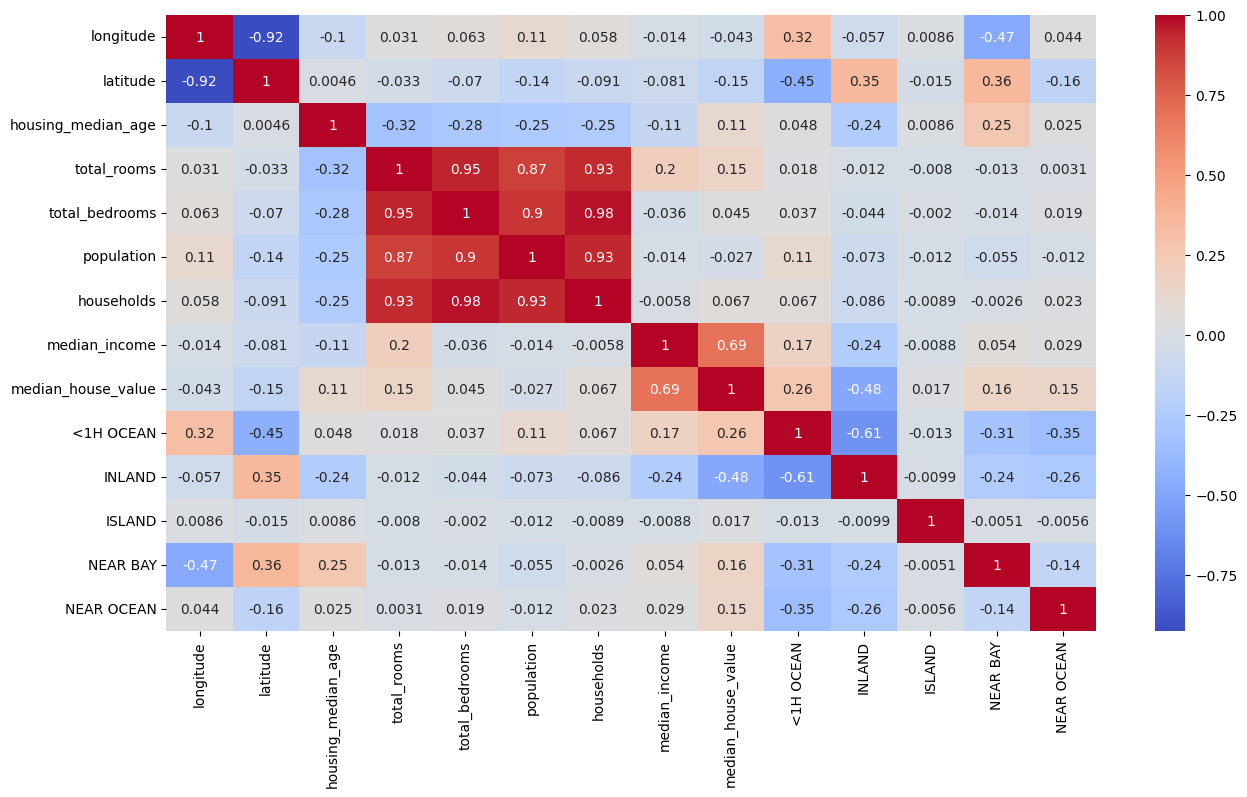

In [11]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap='coolwarm')

**Observation:**  
- Now we can see that `<1H Ocean` has high correlation and `inland` has negative correlation with `median_house_value`

<Axes: xlabel='latitude', ylabel='longitude'>

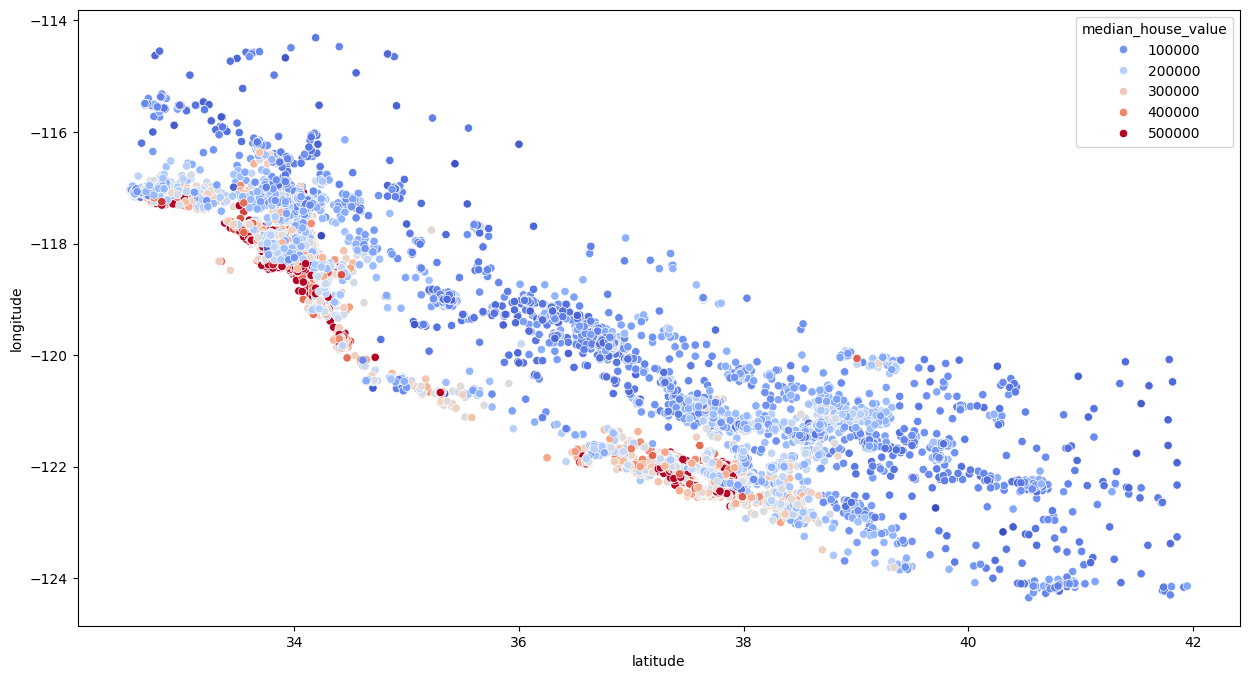

In [12]:
# Since we have the latitue and longitude lets visualize the the speadout
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue = 'median_house_value', palette='coolwarm')

# 5.1 Feature Engineering

In [13]:
train_data['rooms_per_household'] = np.log1p(train_data['total_rooms']/train_data['households'])
train_data['bedroom_ratio'] = np.log1p(train_data['total_bedrooms']/train_data['total_rooms'])

In [14]:
train_data = train_data.drop("ISLAND", axis=1)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN,rooms_per_household,bedroom_ratio
19215,-122.71,38.45,52.0,7.723120,6.287859,6.864848,6.255750,2.1827,188800.0,1,0,0,0,0.804046,0.595623
2763,-115.88,32.93,15.0,5.342334,3.912023,3.951244,3.044522,4.0208,32500.0,0,1,0,0,1.013322,0.549432
10213,-117.90,33.88,34.0,7.242082,5.505332,6.495266,5.568345,4.6750,215400.0,1,0,0,0,0.833162,0.565420
6456,-118.05,34.11,48.0,7.252054,5.720312,6.519147,5.616771,3.2596,272400.0,0,1,0,0,0.829051,0.581537
20563,-121.75,38.67,9.0,9.404261,7.878913,8.830251,7.765993,3.1250,132500.0,0,1,0,0,0.793424,0.608571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20482,-118.72,34.28,17.0,7.884200,6.171701,7.239215,6.113682,5.4459,223900.0,1,0,0,0,0.828377,0.578182
1260,-121.73,38.00,3.0,9.128913,7.328437,8.182839,7.149132,5.0016,189100.0,0,1,0,0,0.822826,0.589326
18817,-120.48,39.66,32.0,7.324490,5.669881,5.720312,4.882802,1.8839,71000.0,0,1,0,0,0.916314,0.573293
12996,-121.25,38.68,15.0,7.311886,5.497168,6.594413,5.493061,4.9688,135600.0,0,1,0,0,0.846346,0.560651


# 6. Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()



# Split the train data again
X_train = train_data.drop(['median_house_value'], axis = 1)
y_train = train_data['median_house_value']

X_train = scaler.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [16]:
test_data = X_test.join(y_test)

In [17]:
from preprocessing import preprocessing

test_data = preprocessing(test_data)

test_data = test_data.drop("ISLAND", axis=1)

test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN,rooms_per_household,bedroom_ratio
7789,-118.07,33.89,29.0,7.037906,5.384495,6.872128,5.407172,4.5370,185300.0,1,0,0,0,0.833599,0.568191
12272,-116.99,33.99,22.0,8.349484,6.490724,7.522941,6.429719,4.7356,195900.0,0,1,0,0,0.832290,0.575140
20487,-118.67,34.30,5.0,8.719971,6.716595,7.800163,6.602588,7.9013,393000.0,1,0,0,0,0.841864,0.571123
11480,-118.03,33.72,24.0,8.557183,6.864848,7.810353,6.853299,5.1630,261000.0,1,0,0,0,0.810318,0.589026
14005,-117.18,32.76,52.0,7.612831,5.710427,6.476972,5.655992,4.7396,441700.0,0,0,0,1,0.852702,0.559676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14108,-117.11,32.75,20.0,7.419381,6.152733,7.164720,6.100319,2.0893,101100.0,0,0,0,1,0.795807,0.603922
17221,-119.71,34.45,35.0,7.688913,5.897154,6.896694,5.863631,5.5922,384400.0,1,0,0,0,0.837805,0.569265
15920,-122.43,37.73,52.0,7.367709,5.852202,6.841615,5.834811,4.6786,263200.0,0,0,1,0,0.816566,0.584617
4250,-118.35,34.10,26.0,8.288534,6.957497,7.450661,6.841615,3.3580,364500.0,1,0,0,0,0.793666,0.609446


In [18]:
# Split the test data again
X_test = test_data.drop(['median_house_value'], axis = 1)
y_test = test_data['median_house_value']


X_test = scaler.transform(X_test)

In [19]:
reg.score(X_test, y_test)

0.6659858046151135

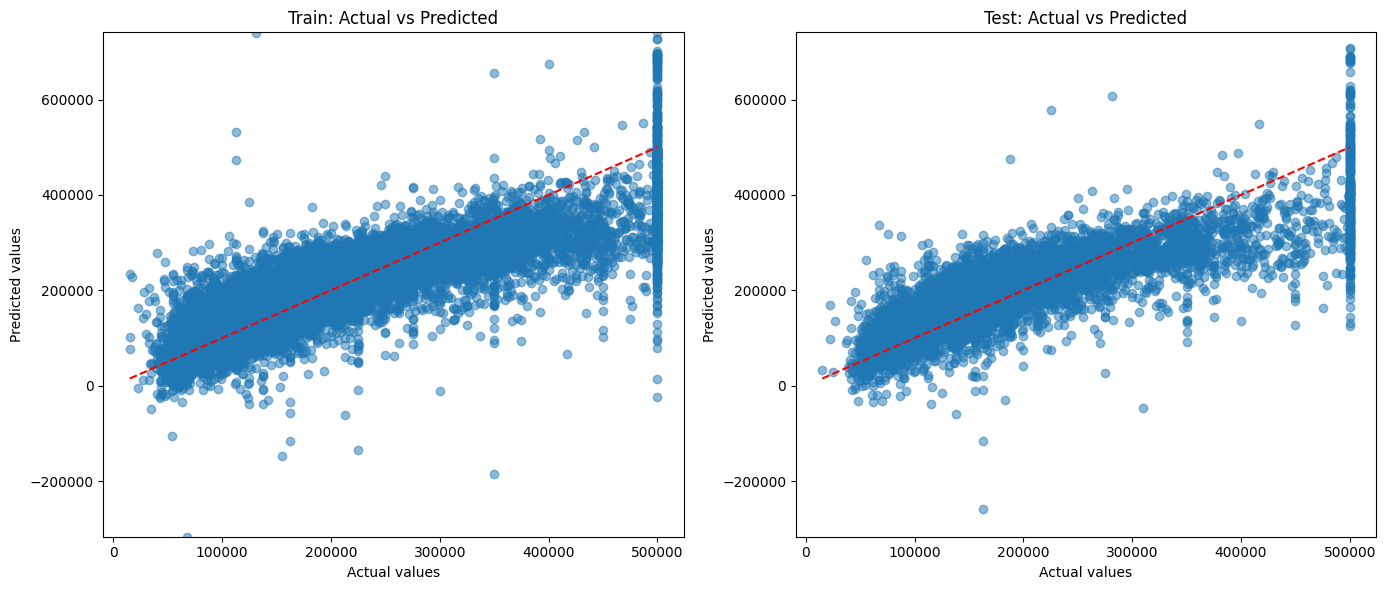

In [20]:
import matplotlib.pyplot as plt

y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

plt.figure(figsize=(14, 6))

# Training set
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.title('Train: Actual vs Predicted')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

y_min = min(y_train.min(), y_test.min(), y_train_pred.min(), y_test_pred.min())
y_max = max(y_train.max(), y_test.max(), y_train_pred.max(), y_test_pred.max())

plt.ylim(y_min, y_max)


# Testing set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Test: Actual vs Predicted')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

y_min = min(y_train.min(), y_test.min(), y_train_pred.min(), y_test_pred.min())
y_max = max(y_train.max(), y_test.max(), y_train_pred.max(), y_test_pred.max())

plt.ylim(y_min, y_max) 


plt.tight_layout()
plt.show()


# 7. Randomn Forest Model

In [21]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train, y_train)

RandomForestRegressor()

In [22]:
forest.score(X_test, y_test)

0.8084590121187565

## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],

}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)

grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_estimator_

In [ ]:
grid_search.best_estimator_.score(X_test, y_test)

# 8. Prediction using User Input

In [31]:
def preprocess_user_input(data):

    data['total_rooms'] = np.log1p(data['total_rooms'])
    data['total_bedrooms'] = np.log1p(data['total_bedrooms'])
    data['population'] = np.log1p(data['population'])
    data['households'] = np.log1p(data['households'])

    # One-hot encoding on  'ocean_proximity' column 
    data = data.join(pd.get_dummies(data['ocean_proximity']).astype(int))

    expected_cols = ['<1H OCEAN', 'INLAND',
                     'NEAR BAY', 'NEAR OCEAN']

    for col in expected_cols:
        if col not in data.columns:
            data[col] = 0
    
    data = data.drop('ocean_proximity', axis=1)

    # Create new features
    data['rooms_per_household'] = np.log1p(data['total_rooms'] / data['households'])
    data['bedroom_ratio'] = np.log1p(data['total_bedrooms'] / data['total_rooms'])

    return data   

In [ ]:
def predict(housing_median_age, total_rooms, total_bedrooms,
            population, households, median_income,
            ocean_proximity='INLAND',
            longitude=36.5, latitude=-119.5,
            model=None):

    import pandas as pd
    input_data = pd.DataFrame([{
        "longitude": longitude,
        "latitude": latitude,
        "housing_median_age": housing_median_age,
        "total_rooms": total_rooms,
        "total_bedrooms": total_bedrooms,
        "population": population,
        "households": households,
        "median_income": median_income,
        "ocean_proximity": ocean_proximity
    }])

    processed_data = preprocess_user_input(input_data)

    prediction = model.predict(processed_data)

    return prediction[0]    

In [35]:
def get_user_inputs():
    print("Enter the following details (press Enter to use default values for latitude/longitude):")

    housing_median_age = float(input("Housing Median Age: "))
    total_rooms = float(input("Total Rooms: "))
    total_bedrooms = float(input("Total Bedrooms: "))
    population = float(input("Population: "))
    households = float(input("Households: "))
    median_income = float(input("Median Income: "))
    ocean_proximity = input("Ocean Proximity (<1H OCEAN, INLAND, NEAR OCEAN, NEAR BAY, ISLAND): ").strip().upper()
    if ocean_proximity == "ISLAND":
        ocean_proximity = "<1H OCEAN"

    longitude = input("Longitude (default = -119.5): ")
    latitude = input("Latitude (default = 36.5): ")
    longitude = float(longitude) if longitude else -119.5
    latitude = float(latitude) if latitude else 36.5

    return (
        housing_median_age, total_rooms,
        total_bedrooms, population, households,
        median_income, ocean_proximity, longitude, latitude
    )

In [ ]:
user_inputs = get_user_inputs()

In [ ]:
prediction = predict(*user_inputs, model=forest)

print(f"\nPredicted House Value: ${prediction:.2f}")

c:\Users\rk\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(



Predicted House Value: $399832.56
